# Exploratory data Analysis and Data Visualization

In [ ]:
#importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#importing the dataset

train = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')

In [3]:
#checking the 1st five rows of the dataset

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking the number of row an columns of the dataset

train.shape

(891, 11)

In [6]:
#checking the summary of the data

train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#checking the missing data

train.isnull().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

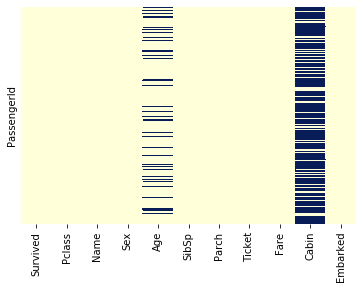

In [7]:
#Visualizing the missing data

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

### We can see that there are missing values in column Age and Cabin. Also, there are two missing values in column Embarked.

In [8]:
#checking the percentage of values missing in column Age

miss_val_col_age = 177/891
print('Percentage of values missing in column Age: ',miss_val_col_age)

#checking the percentage of values missing in column Cabin

miss_val_col_cabin = 687/891
print('Percentage of values missing in column Cabin: ',miss_val_col_cabin)

Percentage of values missing in column Age:  0.19865319865319866
Percentage of values missing in column Cabin:  0.7710437710437711


### We can see that around 20% of the values are missing from the Age column and 77% of data missing from Cabin column. We'll impute the missing value later for now let's explore each column and get our hands dirty in the data.

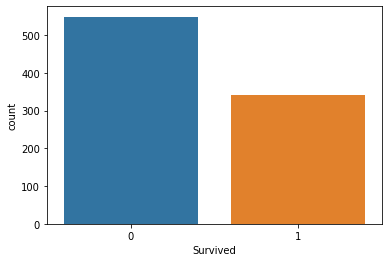

In [10]:
#Survived

sns.set_style(style=None, rc=None)
sns.countplot(train['Survived'], label="Count")

### We can see that the number of people survived is less than the number of people could not survive

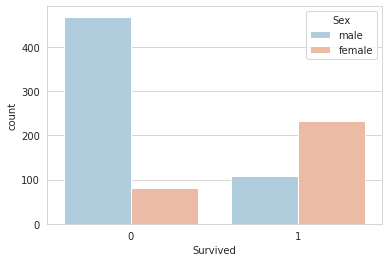

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

### There are less number of males who survided than females

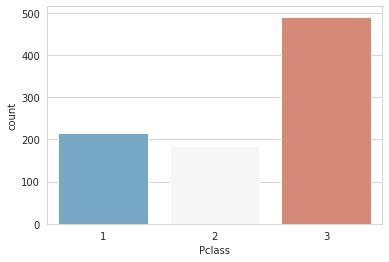

In [14]:
#Pclass

sns.countplot(train['Pclass'], label="Count", palette='RdBu_r')

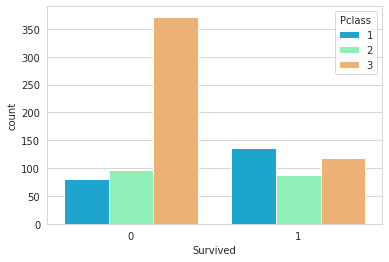

In [15]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

### With this we can understand that pclass 1 passengers survived more followed by pclass 3 and then pclass 2

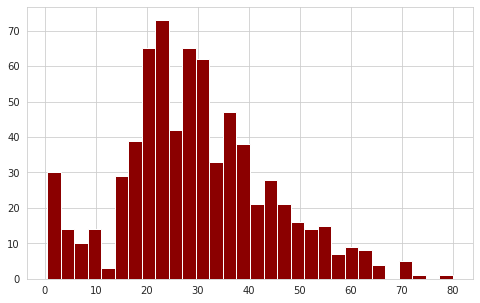

In [18]:
#Age

train['Age'].hist(bins=30,color='darkred', figsize=(8,5))

### Since age is continues data type we chose histogram to plot it for the analysis. We can see from the plot that highest age of the passenger is above 70.

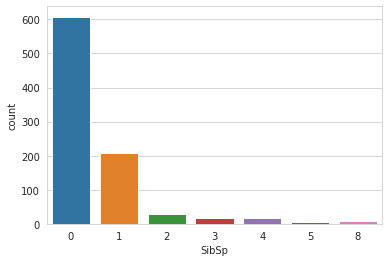

In [20]:
#SibSp

sns.countplot(x='SibSp', data=train)

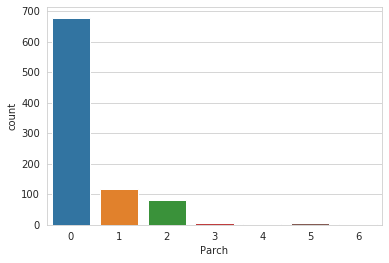

In [21]:
#Parch

sns.countplot(x='Parch', data=train)

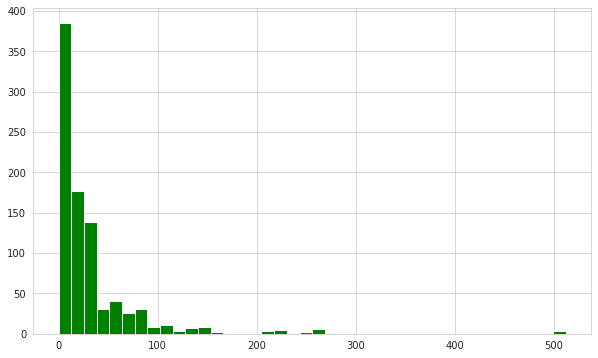

In [22]:
#Fare

train['Fare'].hist(color='green',bins=40,figsize=(10,6))

# Analyze by pivoting features

### We can analyze our data by checking the correlation between our features by pivoting features against each other. Let's start!¶

In [24]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [26]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [28]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Data Cleaning

### As we have seen above that columns Age, Cabin and Embarked have values missing. 20% missing from age column, huge data missing from cabin column and 2 values missing from Embarked column. So, what we going to do is:
1. We'll drop the column Cabin
2. We'll fill the values in Age column using imputation
3. We'll fill the values and convert the column into numerical data

In [30]:
#dropping the column Cabin

train.drop('Cabin', axis=1, inplace=True)

In [31]:
#Creating function to fill values in Age column by taking Pclass as support

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [32]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

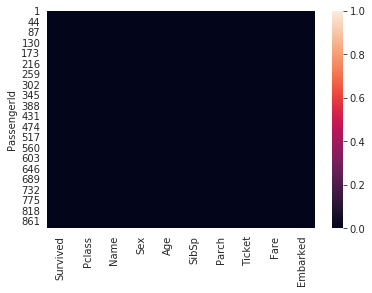

In [34]:
#Lets see in the plot if column Age has been imputed or not

sns.heatmap(train.isnull())

### We can see in the above plot that the column Age has been filled with the values. Now, we have our last work in the data cleaninf left with is filling 2 of those values in Embarked

In [36]:
train['Embarked'] = train['Embarked'].fillna('S') 

In [37]:
#Checking if there is still any missing value left in our data

train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 116.6+ KB


### We can see that there is no missing values and there 891 rows. But wait wait! we still some left to do. In order to prepare our data for modelling we'll need to convert the categorical data in to numeric. We can do it with the help of LabelEncoding and OneHotEncoding.
1. We can see that the column 'Name' wont contribute much in preparing model and predictions so, we'll either drop this column or we'll not consider it as a feature.

2. Talking about column 'Sex' and 'Embarked' column we'll create the dummy variables of the same.

3. Coming to 'Ticket' column, it is mix of numeric and alphanumerical datatype, so we can drop it as it will also contribute less to our predictions.

In [40]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [41]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [42]:
train = pd.concat([train,sex,embark],axis=1)

In [43]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


### Yay! our data is ready for modelling

## Data cleaning of test data

In [46]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
#Lets drop unnecessary columns

test.drop(['Name','Ticket', 'Cabin'], axis=1, inplace=True)

In [48]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [49]:
# Lets create dummy columns for 'Sex' and 'Embarked' columns

s = pd.get_dummies(test['Sex'], drop_first=True)
e = pd.get_dummies(test['Embarked'], drop_first=True)

In [50]:
test = pd.concat([test,s,e],axis=1)

In [51]:
test.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [63]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [65]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [67]:
test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

# Predictive Data Analysis

In [78]:
#Importing the required librarries

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

In [79]:
#Splitting the data into test and train

x_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
x_test  = test
x_train.shape, y_train.shape, x_test.shape

((891, 8), (891,), (418, 8))

In [80]:
# Linear Regression

lreg = LinearRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)
acc_lreg = round(lreg.score(x_train, y_train) * 100, 2)
acc_lreg

39.94

In [85]:
# Logistic Regression

logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

/home/riya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


81.14

In [86]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

98.2

In [87]:
#KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

83.61

In [88]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

98.2

# Model Evaluation

In [101]:
models = pd.DataFrame({
    'Model': ['KNN','Logistic Regression', 
              'Random Forest','Linear Regression', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, acc_random_forest,acc_lreg, 
               acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,98.20
4,Decision Tree,98.20
0,KNN,83.61
1,Logistic Regression,81.14
3,Linear Regression,39.94


### We see that Random forest and Decision tree are performing the best.

In [114]:
# Converting submission to csv file

output = pd.DataFrame({'PassengerId': test.index,
                       'Survived': y_pred})
output.to_csv('submission.csv', index=False)